In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
from SDMBench import *
import palettable
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/home/yzy/projects/SDMBench/analysis/unzip/default_comparison'

In [3]:
data_dict = {
    '151507':'Dataset1@Visium@Sequencing',
    '151508':'Dataset2@Visium@Sequencing',
    '151509':'Dataset3@Visium@Sequencing',
    '151510':'Dataset4@Visium@Sequencing',
    '151669':'Dataset5@Visium@Sequencing',
    '151670':'Dataset6@Visium@Sequencing',
    '151671':'Dataset7@Visium@Sequencing',
    '151672':'Dataset8@Visium@Sequencing',
    '151673':'Dataset9@Visium@Sequencing',
    '151674':'Dataset10@Visium@Sequencing',
    '151675':'Dataset11@Visium@Sequencing',
    '151676':'Dataset12@Visium@Sequencing',
    
    'global_z0':'Dataset13@SMI@Sequencing',
    'global_z1':'Dataset14@SMI@Sequencing',
    'global_z2':'Dataset15@SMI@Sequencing',
    'global_z3':'Dataset16@SMI@Sequencing',
    'global_z4':'Dataset17@SMI@Sequencing',
    
    'Slice_1':'Dataset18@BaristaSeq@Sequencing',
    'Slice_2':'Dataset19@BaristaSeq@Sequencing',
    'Slice_3':'Dataset20@BaristaSeq@Sequencing',
    
    'mouse_VISp':'Dataset21@SeqFISH@Imaging',
    
    'MERFISH_0.04':'Dataset22@MERFISH@Imaging',
    'MERFISH_0.09':'Dataset23@MERFISH@Imaging',
    'MERFISH_0.14':'Dataset24@MERFISH@Imaging',
    'MERFISH_0.19':'Dataset25@MERFISH@Imaging',
    'MERFISH_0.24':'Dataset26@MERFISH@Imaging',
    
    'osmfish':'Dataset27@osmFISH@Imaging',
    
    '20180417_BZ5_control':'Dataset28@STARmap@Imaging',
    '20180419_BZ9_control':'Dataset29@STARmap@Imaging',
    '20180424_BZ14_control':'Dataset30@STARmap@Imaging',
    
    'STARmap_20180505_BY3_1k':'Dataset31@STARmap1k@Imaging'
        
}

data_gt_dict = {
    '151507':'Region',
    '151508':'Region',
    '151509':'Region',
    '151510':'Region',
    '151669':'Region',
    '151670':'Region',
    '151671':'Region',
    '151672':'Region',
    '151673':'Region',
    '151674':'Region',
    '151675':'Region',
    '151676':'Region',
    
    'global_z0':'region',
    'global_z1':'region',
    'global_z2':'region',
    'global_z3':'region',
    'global_z4':'region',
    
    'Slice_1':'layer',
    'Slice_2':'layer',
    'Slice_3':'layer',
    
    'mouse_VISp':'layer',
    
    'MERFISH_0.04':'Region',
    'MERFISH_0.09':'Region',
    'MERFISH_0.14':'Region',
    'MERFISH_0.19':'Region',
    'MERFISH_0.24':'Region',
    
    'osmfish':'Region',
    
    '20180417_BZ5_control':'region',
    '20180419_BZ9_control':'region',
    '20180424_BZ14_control':'region',
    
    'STARmap_20180505_BY3_1k':'region'
        
}

In [4]:
f = '/home/yzy/projects/SDMBench/analysis/unzip/default_comparison/dlpfc/BASS/BASS_151507.h5ad'
adata = sc.read_h5ad(f)

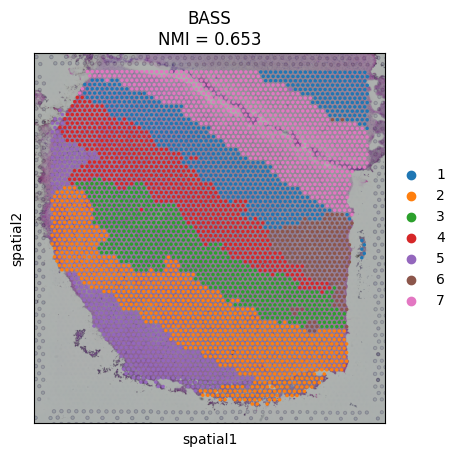

In [9]:
method = 'BASS'
adata_valid = adata[np.logical_not(adata.obs['Region'].isna())]
NMI = normalized_mutual_info_score(adata_valid.obs['Region'],adata_valid.obs['pred_1'])
NMI = np.round(NMI,3)
title = f'{method}\nNMI = {NMI}'
sc.pl.spatial(adata,color='pred_1',title=title)

In [14]:
import collections
X_dict = collections.defaultdict(list)
import os
rootdir = path

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        file_whole = os.path.join(subdir, file)


        if file.endswith('.h5ad'):
            
            methodname = subdir.split('/')[-1]
            dataname_idx2 = file.rfind('.')
            dataname_idx1 = file.rfind(methodname)+len(methodname)
            dataname = file[dataname_idx1+1:dataname_idx2]
            
            
            for dn in data_dict.keys():
                if dn in dataname:
                    dataname = dn
                    break
            
    
            
            adata = sc.read_h5ad(file_whole)
            gt_key = data_gt_dict[dataname]
            adata = adata[np.logical_not(adata.obs[gt_key].isna())]
            
            DatasetID = data_dict[dataname].split('@')[0]
            Biotech = data_dict[dataname].split('@')[1]
            BiotechType = data_dict[dataname].split('@')[2]
            print(methodname,dataname,gt_key in adata.obs)
            os.makedirs(f'figures/spatial/{DatasetID}',exist_ok=True)
            for i in range(10):
                Replicate = i
                adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
                adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('category')
                
                adata.obs[gt_key] = adata.obs[gt_key].astype('str')
                adata.obs[gt_key] = adata.obs[gt_key].astype('category')
                method = methodname
                adata_valid = adata[np.logical_not(adata.obs[gt_key].isna())]
                NMI = normalized_mutual_info_score(adata_valid.obs[gt_key],adata_valid.obs[f'pred_{i+1}'])
                NMI = np.round(NMI,3)
                title = f'{method}\nNMI = {NMI}'
                
                if Biotech=='Visium':
                    ax = sc.pl.spatial(adata,color=f'pred_{i+1}',title=title,show=False)  
                else:
                    ax = sc.pl.embedding(adata,basis='spatial',color=f'pred_{i+1}',show=False,title=title)
                    ax.axis('equal')

                plt.savefig(f'figures/spatial/{DatasetID}/{methodname}_{i}.pdf',dpi=400,bbox_inches='tight')
                plt.close()
            if Biotech=='Visium':
                ax = sc.pl.spatial(adata,color=gt_key,title='Ground Truth',show=False)  
            else:
                ax = sc.pl.embedding(adata,basis='spatial',color=gt_key,show=False,title='Ground Truth')
                ax.axis('equal')

            plt.savefig(f'figures/spatial/{DatasetID}/GT.pdf',dpi=400,bbox_inches='tight',transparent=True)
            plt.close()
                

   
                
                


SpaGCN_with 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_with 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SEDR 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BASS 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


conST_nopre 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaceFlow 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


louvain 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SCAN-IT 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


stLearn 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


CCST 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


BayesSpace 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


STAGATE 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


leiden 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151507 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151508 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151509 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151510 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151669 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151670 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151671 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151672 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151673 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151674 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151675 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


DeepST 151676 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')


SpaGCN_without global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST global_z0 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST global_z1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST global_z2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST global_z3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST global_z4 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE mouse_VISp True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE Slice_1 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE Slice_3 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE Slice_2 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE osmfish True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without 20180417_BZ5_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

SpaGCN_without 20180419_BZ9_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without STARmap_20180505_BY3_1k True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

SEDR 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR 20180419_BZ9_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS 20180419_BZ9_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre 20180419_BZ9_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

SpaceFlow 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow STARmap_20180505_BY3_1k True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

SpaceFlow 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow 20180419_BZ9_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

louvain 20180424_BZ14_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

louvain 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain 20180419_BZ9_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

louvain STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT 20180419_BZ9_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

CCST 20180417_BZ5_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

CCST 20180419_BZ9_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

CCST STARmap_20180505_BY3_1k True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

CCST 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden 20180419_BZ9_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden 20180424_BZ14_control True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

leiden STARmap_20180505_BY3_1k True


/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-pac

DeepST 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST 20180419_BZ9_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE 20180424_BZ14_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE STARmap_20180505_BY3_1k True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE 20180417_BZ5_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE 20180419_BZ9_control True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaGCN_without MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SEDR MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

BASS MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

conST_nopre MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SpaceFlow MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

louvain MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

SCAN-IT MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

CCST MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

STAGATE MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

leiden MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST MERFISH_0.04 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST MERFISH_0.09 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST MERFISH_0.14 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST MERFISH_0.19 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg

DeepST MERFISH_0.24 True


/tmp/ipykernel_123509/945329082.py:37: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[f'pred_{i+1}'] = adata.obs[f'pred_{i+1}'].astype('str')
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yzy/anaconda3/envs/SDMBench/lib/python3.9/site-packages/scanpy-1.9.1-py3.9.egg